Basic import statements for the project

In [149]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
#glob is useful for working with filepaths
import glob
import math
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import re
from sklearn.cluster import KMeans
import time

1. Function for returning a list of filenames for the dance data

In [150]:
def get_file_list():
    #Saving all of the filepaths in data
    data = []
    for folder in glob.glob("../data/*"):
        if (folder[-3:] != '.md' and folder[-6:] != '.ipynb'):
            #print(glob.glob(folder+'/*')[0])
            data.append(glob.glob(folder+'/*')[0])
    return data
        
files = get_file_list()

The following cell defines the columns for our data.

In [151]:
data_columns = ['head_x', 'head_y', 'head_z',
               'neck_x', 'neck_y', 'neck_z',
               'spine_x', 'spine_y', 'spine_z',
               'hip_x', 'hip_y', 'hip_z',
               'shoulderl_x', 'shoulderl_y', 'shoulderl_z',
               'shoulderr_x', 'shoulderr_y', 'shoulderr_z',
               'elbowl_x', 'elbowl_y', 'elbowl_z',
               'elbowr_x', 'elbowr_y', 'elbowr_z',
               'wristl_x', 'wristl_y', 'wristl_z',
               'wristr_x', 'wristr_y', 'wristr_z',
               'handl_x', 'handl_y', 'handl_z',
               'handr_x', 'handr_y', 'handr_z',
               'handtipl_x', 'handtipl_y', 'handtipl_z',
               'handtipr_x', 'handtipr_y', 'handtipr_z',
               'hipl_x', 'hipl_y', 'hipl_z',
               'hipr_x', 'hipr_y', 'hipr_z',
               'kneel_x', 'kneel_y', 'kneel_z',
               'kneer_x', 'kneer_y', 'kneer_z',
               'anklel_x', 'anklel_y', 'anklel_z',
               'ankler_x', 'ankler_y', 'ankler_z',
               'footl_x', 'footl_y', 'footl_z',
               'footr_x', 'footr_y', 'footr_z']

In [152]:
def create_df(filename):
    array2d = []
    
    #opening file
    fp = open(filename, 'r')
    line = fp.readline()
    
    #find first line with all data points accounted for
    #this serves to skip any frames where the square_handtip_distance would be improperly calculated
    frame_min = 0
    #this tracks how many lines are skipped so the df index lines up with the line number of the txt files
    lineno = 0
    while frame_min == 0:
        frame = line.split()
        for i in range(len(frame)):
            frame[i] = abs(float(frame[i]))
        line = fp.readline()
        frame_min = min(frame)
        lineno += 1
        

    #parsing lines of txt file
    while line:
        #splitting numbers into array
        frame = line.split()
        #converting strings to floats
        for i in range(len(frame)):
            frame[i] = float(frame[i])
            #adding frame to array
        array2d.append(frame)
        line = fp.readline()
        #checking to see if all data is missing (implies dancer left screen, df can end) and ending parsing while loop
        if sum(map(abs, frame)) == 0.0:
            line = 0

    #inputting file into dataframe
    df = pd.DataFrame(array2d, columns = data_columns)
    #adjusting df index to line up with txt files
    df.index += lineno

    #defining distance between handtips
    df["square_handtip_distance"] = (df['handtipl_x'] - df['handtipr_x'])**2 + (df['handtipl_y'] - df['handtipr_y'])**2 + (df['handtipl_z'] - df['handtipr_z'])**2
    
    #currently is just an estimation, taking the first frame where the hand distance is less than 0.1
    clap_frame = df[df["square_handtip_distance"] < 0.01].index[0].copy()
    
    #add columns for time stamp and beat index
    df["time_stamp"] = 0
    df["beat_index"] = 0
    clap_onwards = df.iloc[clap_frame:]
    clap_onwards
    return df, clap_frame

In [153]:
clap, frame = create_df('../data/2On_Tinashe/3jVtllWS5CFFWLQng8sKsr_date2_7_2On_Tinashe_1.txt')
clap[clap.columns[36:]]#.loc[1795:1810]
#clap['square_handtip_distance'].max()
clap

FileNotFoundError: [Errno 2] No such file or directory: '../data/2On_Tinashe/3jVtllWS5CFFWLQng8sKsr_date2_7_2On_Tinashe_1.txt'

In [154]:
seconds = []
for file in files:
    file = file.replace('\\', '/')
    print(file)
    clap_onwards, clap_frame = create_df(file)
    seconds.append(clap_onwards.shape[0]/15)
    
seconds

../data/1,2Step_Ciara/3qEu5RQnsEcSBX8SkiwJEG_date3_13_1,2Step_Ciara_2.txt
../data/1999_CharliXCX/05mAIVLkIWc2d1UBYZBCp8_date12_20_1999_CharliXCX_2.txt
../data/3Nights_DominicFike/1tNJrcVe6gwLEiZCtprs1u_date2_7_3Nights_DominicFike_4.txt
../data/9to5_DollyParton/4w3tQBXhn5345eUXDGBWZG_date3_6_9to5_DollyParton_2.txt
../data/AdoreYou_HarryStyles/1M4qEo4HE3PRaCOM7EXNJq_date3_4_AdoreYou_HarryStyles_2.txt
../data/AGoodNight_JohnLegend/7gevvAspxft2qQmcvJjNBH_date2_21_AGoodNight_JohnLegend_2.txt
../data/BadGirls_MIA/5G6aQWH215hCxdhfCqI7XB_date2_21_BadGirls_MIA_2.txt
../data/BadGuy_BillieEilish1/2Fxmhks0bxGSBdJ92vM42m_date12_20_BadGuy-BillieEilish_2.txt
../data/BadGuy_BillieEilish2/2Fxmhks0bxGSBdJ92vM42m_date12_23_BadGuy_BillieEilish_4.txt
../data/BaptizedInFire_KidCudi/6WSBZroxQaO3FYEpT2ACFH_date11_25_BaptisedinFire_KidCudi_2.txt
../data/BestOfMyLove_TheEmotions/2M2WJ7gBlcKNxdhyfPp9zY_date2_21_BestOfMyLove_TheEmotions_2.txt
../data/BoaNoite_KarolConka/4VT6fxUYk5cXmO3VSbFQ4k_date2_21_BoaNoite_Ka

../data/MakeUp_ArianaGrande/27356GVuMPFWiJSZCragoM_date3_13_MakeUp_ArianaGrande_2.txt
../data/Malamente_Rosalia/1B0BQaSRHxhI0AUlItY3LK_date2_7_Malamente_Rosalia_2.txt
../data/Maneater_DarylHall&JohnOates/4aKIs5t9TqP59btlCGPrgw_date3_13_Maneater_DarylHall&JohnOates_2.txt
../data/Me&U_Cassie/7k6IzwMGpxnRghE7YosnXT_date2_21_Me&U_Cassie_2.txt
../data/MiGente_JBalvin/2rb5MvYT7ZIxbKW5hfcHx8_date2_19_MiGente_JBalvin_2.txt
../data/Money_Leikeli47/7wfQfnNFGWLD0BzcDngCRg_date12_21_Money_Leikeli47_2.txt
../data/Motivation_Normani/0rIAC4PXANcKmitJfoqmVm_date12_21_Motivation_Normani_4.txt
../data/Motivation_Normani2/0rIAC4PXANcKmitJfoqmVm_date2_5_Motivation_Normani_4.txt
../data/MyType_Saweetie/5KBARWIxeMGkvUax9VtVC9_date2_19_MyType_Saweetie_2.txt
../data/NaughtyGirl_Beyonce/0YGQ3hZcRLC5YX7o0hdmHg_date1_31_NaughtyGirl_Beyonce_2.txt
../data/NoOne_AliciaKeys/6IwKcFdiRQZOWeYNhUiWIv_date3_13_NoOne_AliciaKeys_2.txt
../data/OneDance_Drake/1zi7xx7UVEFkmKfv06H8x0_date2_7_OneDance_Drake_1.5.txt
../data/OneT

[352.8,
 210.6,
 381.26666666666665,
 282.6666666666667,
 291.6,
 328.1333333333333,
 306.93333333333334,
 198.66666666666666,
 293.1333333333333,
 334.4,
 275.46666666666664,
 394.6,
 312.6,
 308.2,
 272.73333333333335,
 241.6,
 280.1333333333333,
 308.6,
 352.2,
 370.2,
 451.06666666666666,
 374.53333333333336,
 369.46666666666664,
 295.6,
 248.06666666666666,
 346.6666666666667,
 314.26666666666665,
 249.6,
 395.2,
 326.06666666666666,
 379.73333333333335,
 460.0,
 300.0,
 296.73333333333335,
 346.46666666666664,
 253.26666666666668,
 331.4,
 257.93333333333334,
 292.26666666666665,
 264.4,
 266.8666666666667,
 357.46666666666664,
 436.3333333333333,
 354.4,
 426.8666666666667,
 363.8666666666667,
 283.93333333333334,
 321.2,
 400.1333333333333,
 388.3333333333333,
 359.6,
 324.06666666666666,
 241.4,
 289.1333333333333,
 298.8,
 351.8666666666667,
 320.06666666666666,
 343.93333333333334,
 324.8666666666667,
 425.8666666666667,
 392.4,
 385.8,
 292.6,
 253.06666666666666,
 439.5333

In [155]:
#song_id = extrapolate_id('../data/2On_Tinashe/3jVtllWS5CFFWLQng8sKsr_date2_7_2On_Tinashe_1.txt')
#beats = get_beats(song_id, '../data/2On_Tinashe/3jVtllWS5CFFWLQng8sKsr_date2_7_2On_Tinashe_1.txt')
#beats[-1]['start']
song_seconds = []
for file in files:
    file = file.replace('\\', '/')
    #print(file)
    song_id = extrapolate_id(file)
    print(song_id)
    beats = get_beats(song_id, file)
    print(beats[1])
    print(beats[-1]['start'])
    song_seconds.append(beats[-1]['start'])
    
song_seconds

3qEu5RQnsEcSBX8SkiwJEG
{'start': 9.17475, 'duration': 0.53417, 'confidence': 0.774}
201.91015
05mAIVLkIWc2d1UBYZBCp8
{'start': 8.51794, 'duration': 0.48372, 'confidence': 0.725}
187.56485
1tNJrcVe6gwLEiZCtprs1u
{'start': 13.15851, 'duration': 0.3945, 'confidence': 0.527}
176.38227
4w3tQBXhn5345eUXDGBWZG
{'start': 10.81246, 'duration': 0.59673, 'confidence': 0.718}
160.82567
1M4qEo4HE3PRaCOM7EXNJq
{'start': 10.39346, 'duration': 0.60447, 'confidence': 0.745}
204.21693
7gevvAspxft2qQmcvJjNBH
{'start': 9.83278, 'duration': 0.54689, 'confidence': 0.667}
200.77344
5G6aQWH215hCxdhfCqI7XB
{'start': 7.38544, 'duration': 0.41891, 'confidence': 0.605}
227.20335
2Fxmhks0bxGSBdJ92vM42m
{'start': 7.80114, 'duration': 0.44662, 'confidence': 0.682}
190.57575
2Fxmhks0bxGSBdJ92vM42m
{'start': 14.9203, 'duration': 0.44241, 'confidence': 0.712}
190.57575
6WSBZroxQaO3FYEpT2ACFH
{'start': 7.38491, 'duration': 0.39044, 'confidence': 0.442}
280.23305
2M2WJ7gBlcKNxdhyfPp9zY
{'start': 9.16691, 'duration': 0.53

{'start': 8.66556, 'duration': 0.48669, 'confidence': 0.664}
214.53054
5EYi2rH4LYs6M21ZLOyQTx
{'start': 8.80109, 'duration': 0.5107, 'confidence': 0.451}
151.38791
5gW5dSy3vXJxgzma4rQuzH
{'start': 8.90754, 'duration': 0.5212, 'confidence': 0.872}
193.60337
27356GVuMPFWiJSZCragoM
{'start': 10.2165, 'duration': 0.57158, 'confidence': 0.497}
138.1908
1B0BQaSRHxhI0AUlItY3LK
{'start': 10.46961, 'duration': 0.61207, 'confidence': 0.923}
146.70503
4aKIs5t9TqP59btlCGPrgw
{'start': 12.27383, 'duration': 0.67507, 'confidence': 0.929}
269.85647
7k6IzwMGpxnRghE7YosnXT
{'start': 10.77684, 'duration': 0.60059, 'confidence': 0.645}
190.7872
2rb5MvYT7ZIxbKW5hfcHx8
{'start': 10.20753, 'duration': 0.60594, 'confidence': 0.664}
184.15144
7wfQfnNFGWLD0BzcDngCRg
{'start': 10.52066, 'duration': 0.605, 'confidence': 0.774}
172.22589
0rIAC4PXANcKmitJfoqmVm
{'start': 12.20591, 'duration': 0.34604, 'confidence': 0.167}
191.12578
0rIAC4PXANcKmitJfoqmVm
{'start': 12.20591, 'duration': 0.34604, 'confidence': 0.167

[201.91015,
 187.56485,
 176.38227,
 160.82567,
 204.21693,
 200.77344,
 227.20335,
 190.57575,
 190.57575,
 280.23305,
 219.53519,
 164.06593,
 160.86739,
 192.03132,
 206.07194,
 183.31502,
 183.31502,
 226.17579,
 230.02677,
 239.69984,
 199.66504,
 305.50789,
 190.71257,
 190.61886,
 218.84177,
 236.0243,
 209.38936,
 243.05101,
 274.84892,
 195.41132,
 226.08479,
 271.39416,
 180.01331,
 180.01331,
 266.61386,
 211.03259,
 319.17991,
 220.17438,
 218.10823,
 124.90405,
 236.37777,
 204.01807,
 260.24542,
 244.13558,
 230.75976,
 253.67041,
 236.24733,
 291.89446,
 229.92169,
 187.11207,
 218.87227,
 191.68605,
 209.73043,
 250.36915,
 221.86386,
 246.25717,
 193.14609,
 222.18285,
 214.67076,
 199.95851,
 216.00941,
 168.29082,
 177.9445,
 230.98362,
 209.42645,
 196.20879,
 322.55052,
 216.35824,
 216.57259,
 188.46856,
 229.87862,
 212.57181,
 211.91871,
 289.01989,
 289.01989,
 207.11186,
 193.53702,
 229.43907,
 171.56949,
 233.99362,
 241.20366,
 266.81684,
 215.38047,
 216.8

In [158]:
recording_lengths = pd.DataFrame(data=map(list, zip(files, seconds, song_seconds)), columns = ['song', 'seconds', 'song_seconds'])
recording_lengths[recording_lengths["seconds"] > recording_lengths["song_seconds"]]

,song,seconds,song_seconds
0,"../data\1,2Step_Ciara\3qEu5RQnsEcSBX8SkiwJEG_d...",352.800000,201.91015
1,../data\1999_CharliXCX\05mAIVLkIWc2d1UBYZBCp8_...,210.600000,187.56485
2,../data\3Nights_DominicFike\1tNJrcVe6gwLEiZCtp...,381.266667,176.38227
3,../data\9to5_DollyParton\4w3tQBXhn5345eUXDGBWZ...,282.666667,160.82567
4,../data\AdoreYou_HarryStyles\1M4qEo4HE3PRaCOM7...,291.600000,204.21693
...,...,...,...
155,../data\You'llFindAWay(Swith&SindenRemix)_Sant...,326.866667,191.29135
156,../data\YouDaOne_Rihanna\3Yt9lRtS5V4nbJnwcgFgv...,312.800000,197.03245
157,../data\YouDon'tKnowMe_JaxJones\1rFMYAZxBoAKSz...,314.133333,211.03932
158,../data\YouKnowI'mNoGood_AmyWinehouse\4zQuwW24...,305.400000,254.26643


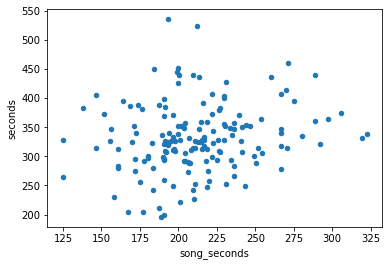

In [157]:
recording_lengths.plot(kind='scatter',x='song_seconds',y='seconds')
plt.show()

In [6]:
#setting up spotify credentials
def set_spotify():
    client_id = 'd0b2731526744c759fcf012a56ec5bd5'
    client_secret = '6e593cabd0e043da9041c5ef5825dec7'

    #Sets up authentication to use the Spotify API
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    #Creates a Spotipy session using the credentials
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    return sp

sp = set_spotify()

In [144]:
'''
#Search for song id and get beats object
#This will be automated in a playlist once that is set up
name = "Billie Eilish"
result = sp.search(name)
artist_uri = result['tracks']['items'][0]['artists'][0]["uri"]
sp_albums = sp.artist_albums(artist_uri, album_type='album')

tracks = sp.album_tracks(sp_albums['items'][0]['uri'])
id = tracks['items'][1]['id']
'''
def get_beats(song_id, filename):
    analysis = sp.audio_analysis(song_id)
    #features = sp.audio_features(song_id)
    #Starting beat will change depending on song
    eight_counts = int(re.search("\d+.txt", filename).group()[0])
    beat_count = eight_counts * 8 #not sure if this should be 4 or eight, we will know when we can visualize
    beats = analysis['beats'][beat_count:]
    return beats


In [8]:
def add_beats(dance, beats, clap_frame, filename):
    eight_counts = int(re.search("\d+.txt", filename).group()[0])
    beat_count = eight_counts * 8 #not sure if this should be 4 or eight, we will know when we can visualize
    #add time stamps to dataframe
    dance.loc[clap_frame, "time_stamp"] = beats[beat_count]["start"]

    current_beat = 0
    #for each row in the data frame...
    for index, row in dance.iterrows():
        time_stamp = beats[0]["start"] + 0.0666666666*(index-clap_frame)
        dance.loc[index, "time_stamp"] = time_stamp #set time stamp for each frame
        if current_beat < len(beats) - 1:
            if beats[current_beat + 1]["start"] < time_stamp:
                current_beat += 1
        dance.loc[index, "beat_index"] = current_beat #set beat index for each frame

    clap_to_end = dance[dance["time_stamp"] < beats[-1]["start"]].copy() #cut off frames where song ends

    return clap_to_end

In [9]:
def extrapolate_id(dataname):
    id_container = re.search("/\w{22}_", dataname).group()
    track_id = id_container[1:-1]
    return track_id

In [10]:
#segment_beats takes the result of parse song and returns a list of dataframes of individual beats to add to training set
def segment_beats(dance_data):
    #groups the dance data by their beat index
    groups = dance_data.groupby('beat_index')
    #initialize empty list to populate with song beats
    song_beats = []
    #iterate through each group and append to song_beats
    for name, group in groups:
        song_beats.append(group)
    return song_beats

In [11]:
#gets the filename for a txt of raw kinekt data with specified naming convention
#returns a df of beats
def standardize_beats(filename):
    array2d = []

    fp = open(filename, 'r')
    line = fp.readline()

    while line:
        frame = line.split()
        for i in range(len(frame)):
            frame[i] = float(frame[i])
        array2d.append(frame)
        line = fp.readline()

    df = pd.DataFrame(array2d, columns = data_columns)

    df["square_handtip_distance"] = (df['handtipl_x'] - df['handtipr_x'])**2 + (df['handtipl_y'] - df['handtipr_y'])**2 + (df['handtipl_z'] - df['handtipr_z'])**2

    non_zero = df[df["square_handtip_distance"] > 0]
    #currently is just an estimation, taking the first frame where the hand distance is less than 0.1
    clap_frame = non_zero[non_zero["square_handtip_distance"] < 0.1].index[0].copy()
    #add columns for time stamp and beat index
    df["time_stamp"] = 0
    df["beat_index"] = 0
    dance = df.iloc[clap_frame:]

    song_id = extrapolate_id(filename)
    beats = get_beats(song_id, filename)
    new_dance = add_beats(dance, beats, clap_frame, filename)
    curr_frame = clap_frame
    last_frame = new_dance.index[-1]
    times = []

    beats_df_start = pd.DataFrame(columns = ["start_time"] + data_columns)
    beats_df_mid = pd.DataFrame(columns = ["start_time"] + data_columns)
    beats_df_end = pd.DataFrame(columns = ["start_time"] + data_columns)


    #last beat is not included because it was excluded from the training set
    ##Start of Beat
    for beat in beats[:-1]:
        beat_data = [beat["start"]]
        if (curr_frame < last_frame):
            while new_dance.loc[curr_frame + 1]["time_stamp"] < beat["start"]:
                curr_frame += 1
            if new_dance.loc[curr_frame + 1]["time_stamp"] > beat["start"]:
                #pinpointing position at beat
                #only for head_x right now, needs to be expanded to all points
                for point in data_columns:
                    f1 = new_dance.loc[curr_frame]
                    f2 = new_dance.loc[curr_frame + 1]
                    beat_pos = f1[point] + (beat["start"] - f1.time_stamp) * ((f2[point] - f1[point]) / (f2.time_stamp - f1.time_stamp))
                    #print(beat_pos)
                    beat_data.append(beat_pos)
                    #times += [beat["start"]]
        #creating a 1 row df for the beat
        beat_line = pd.DataFrame([beat_data], columns = ["start_time"] + data_columns)
        beats_df_start = beats_df_start.append(beat_line)

    curr_frame = clap_frame
    last_frame = new_dance.index[-1]

    #Middle of Beat
    for beat in beats[:-1]:
        beat_data = [beat["start"]]
        beat_mid = beat["start"] + beat["duration"] / 2
        if (curr_frame < last_frame):
            while new_dance.loc[curr_frame + 1]["time_stamp"] < beat_mid:
                curr_frame += 1
            if new_dance.loc[curr_frame + 1]["time_stamp"] > beat_mid:
                #pinpointing position at beat
                #only for head_x right now, needs to be expanded to all points
                for point in data_columns:
                    f1 = new_dance.loc[curr_frame]
                    f2 = new_dance.loc[curr_frame + 1]
                    beat_pos = f1[point] + (beat_mid - f1.time_stamp) * ((f2[point] - f1[point]) / (f2.time_stamp - f1.time_stamp))
                    beat_data.append(beat_pos)
                    #times += [beat["start"]]
        #creating a 1 row df for the beat
        beat_line = pd.DataFrame([beat_data], columns = ["start_time"] + data_columns)
        beats_df_mid = beats_df_mid.append(beat_line)

    #End of Beat
    curr_frame = clap_frame
    last_frame = new_dance.index[-1]
    for beat in beats[:-2]:
        beat_data = [beat["start"]]
        beat_end = beat["start"] + beat["duration"]
        if (curr_frame < last_frame):
            while new_dance.loc[curr_frame + 1]["time_stamp"] < beat_end:
                curr_frame += 1
            if new_dance.loc[curr_frame + 1]["time_stamp"] > beat_end:
                #pinpointing position at beat
                #only for head_x right now, needs to be expanded to all points
                for point in data_columns:
                    f1 = new_dance.loc[curr_frame]
                    f2 = new_dance.loc[curr_frame + 1]
                    beat_pos = f1[point] + (beat_end - f1.time_stamp) * ((f2[point] - f1[point]) / (f2.time_stamp - f1.time_stamp))
                    beat_data.append(beat_pos)
                    #times += [beat["start"]]
        #creating a 1 row df for the beat
        beat_line = pd.DataFrame([beat_data], columns = ["start_time"] + data_columns)
        beats_df_end = beats_df_end.append(beat_line)

    beats_df_end = beats_df_end.append(new_dance.loc[last_frame][:66])
    beats_df_end.loc[last_frame, "start_time"] = beats[-2]["start"] #setting this manually since the data doesn't go this far

    mid_and_end = beats_df_mid.merge(beats_df_end, on="start_time", how="outer", suffixes=["", "_1"])
    standard_beats = beats_df_start.merge(mid_and_end, on="start_time", how="outer", suffixes=["_0", "_1/2"])
    return standard_beats

In [12]:
#setting up dataframe for 2nd neural network (synthesis)
def create_move_df(filename):
    song_id = extrapolate_id(filename)
    beats = get_beats(song_id, filename)
    features = sp.audio_features(song_id)
    song_features = features[0]
    analysis = sp.audio_analysis(song_id)
    sections = analysis['sections']
    curr_section_num = 0
    curr_section = sections[curr_section_num]

    #can add whatever features we feel like later, these ones felt like the most important for now
    cols = ["start_time", "duration", "section", "tempo", "danceability", "energy", "valence"]
    training_df_of_moves = pd.DataFrame(columns=cols)

    #add data to data frame (start, duration, section, tempo, features)
    for beat in beats:
        #sets section number for current beat
        if (curr_section["start"] + curr_section["duration"]) < beat["start"]:
            if curr_section_num + 1 != len(sections):
                curr_section_num = curr_section_num + 1
            curr_section = sections[curr_section_num]
        
        #creating data in row format for df
        beat_data = [beat["start"], beat["duration"], curr_section_num, curr_section["tempo"], song_features["danceability"], song_features["energy"], song_features["valence"]]
        beat_line = pd.DataFrame([beat_data], columns=cols)
        training_df_of_moves = training_df_of_moves.append(beat_line)
    
    #currently no moves, once first network outputs moves for each beat this is where we input it
    training_df_of_moves["move"] = None
    return training_df_of_moves

In [13]:
standardize_beats('../data/Wannabe_SpiceGirls/1Je1IMUlBXcx1Fz0WE7oPT_date12_23_Wannabe_SpiceGirls_0.txt')

c:\users\mason\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,start_time,head_x_0,head_y_0,head_z_0,neck_x_0,neck_y_0,neck_z_0,spine_x_0,spine_y_0,spine_z_0,...,anklel_z_1,ankler_x_1,ankler_y_1,ankler_z_1,footl_x_1,footl_y_1,footl_z_1,footr_x_1,footr_y_1,footr_z_1
0,0.25371,0.298888,0.515556,3.005120,0.333421,0.394791,3.016600,0.316209,0.112909,3.037500,...,2.893405,0.388149,-0.781291,3.033900,0.162484,-0.794852,2.874600,0.419327,-0.827117,2.939772
1,0.69642,0.217616,0.506575,2.917944,0.215638,0.381377,2.938404,0.200090,0.118136,2.950729,...,2.914150,0.294944,-0.749018,3.023535,0.116232,-0.800627,2.793922,0.284744,-0.796933,2.955659
2,1.14002,0.158906,0.522393,2.949293,0.152941,0.390391,2.966208,0.141455,0.117844,2.979710,...,2.884442,0.213888,-0.717715,2.875268,0.113803,-0.774678,2.758125,0.168863,-0.756908,2.790280
3,1.58448,0.090785,0.528761,2.990522,0.074306,0.395229,2.996881,0.074811,0.122559,3.009419,...,3.033419,0.140924,-0.738353,2.863295,-0.149679,-0.783685,2.919149,0.107979,-0.782945,2.737020
4,2.02737,0.008130,0.526957,3.024919,-0.008236,0.392236,3.026049,-0.013990,0.122717,3.037196,...,3.021936,0.140114,-0.749420,2.878170,-0.215027,-0.774393,2.891750,0.141366,-0.784862,2.737782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,188.13562,-0.146904,0.483220,3.425240,-0.151742,0.354738,3.415292,-0.124339,0.111877,3.389891,...,3.261459,-0.167096,-0.679908,3.370407,-0.181969,-0.797284,3.138472,-0.295054,-0.558425,3.330794
415,188.63329,-0.111724,0.495767,3.474683,-0.092984,0.359231,3.478986,-0.094274,0.113763,3.412146,...,3.316041,-0.025766,-0.700257,3.204950,-0.127683,-0.804977,3.242850,-0.025776,-0.783013,3.176564
416,189.12866,-0.080505,0.472065,3.498199,-0.071489,0.341111,3.510092,-0.071904,0.089336,3.438848,...,3.351840,-0.031907,-0.702438,2.776577,-0.089252,-0.808519,3.216637,-0.066154,-0.769866,2.632748
417,189.62387,-0.042732,0.513128,3.500690,-0.002625,0.381488,3.474620,-0.018799,0.110718,3.438550,...,3.345681,0.086240,-0.753011,3.213580,-0.099900,-0.821185,3.223790,0.011058,-0.787345,3.057642


In [14]:
create_move_df('../data/Wannabe_SpiceGirls/1Je1IMUlBXcx1Fz0WE7oPT_date12_23_Wannabe_SpiceGirls_0.txt')

,start_time,duration,section,tempo,danceability,energy,valence,move
0,0.25371,0.44271,0,101.684,0.768,0.864,0.891,None
0,0.69642,0.44360,0,101.684,0.768,0.864,0.891,None
0,1.14002,0.44446,0,101.684,0.768,0.864,0.891,None
0,1.58448,0.44289,0,101.684,0.768,0.864,0.891,None
0,2.02737,0.44366,0,101.684,0.768,0.864,0.891,None
...,...,...,...,...,...,...,...,...
0,188.63329,0.49537,9,108.936,0.768,0.864,0.891,None
0,189.12866,0.49521,9,108.936,0.768,0.864,0.891,None
0,189.62387,0.48176,9,108.936,0.768,0.864,0.891,None
0,190.10562,0.47012,9,108.936,0.768,0.864,0.891,None


In [15]:
#defining columns for beat structure
start = [name + '_0' for name in data_columns]
mid = [name + '_1/2' for name in data_columns]
end = [name + '_1' for name in data_columns]
#cols should be altered as we do more feature engineering, perhaps adding more snapshots or other data (velocity and such)
cols = ["start_time"] + start + mid + end
training_df_of_beats = pd.DataFrame(columns=cols)


for file in files:
    file = file.replace('\\', '/')
    print(file)
    beats = standardize_beats(file)
    training_df_of_beats = pd.concat([training_df_of_beats, beats])
    
training_df_of_beats

../data/1,2Step_Ciara/3qEu5RQnsEcSBX8SkiwJEG_date3_13_1,2Step_Ciara_2.txt


c:\users\mason\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


../data/1999_CharliXCX/05mAIVLkIWc2d1UBYZBCp8_date12_20_1999_CharliXCX_2.txt
../data/2On_Tinashe/3jVtllWS5CFFWLQng8sKsr_date2_7_2On_Tinashe_1.txt
../data/3Nights_DominicFike/1tNJrcVe6gwLEiZCtprs1u_date2_7_3Nights_DominicFike_4.txt
../data/9to5_DollyParton/4w3tQBXhn5345eUXDGBWZG_date3_6_9to5_DollyParton_2.txt
../data/AdoreYou_HarryStyles/1M4qEo4HE3PRaCOM7EXNJq_date3_4_AdoreYou_HarryStyles_2.txt
../data/AGoodNight_JohnLegend/7gevvAspxft2qQmcvJjNBH_date2_21_AGoodNight_JohnLegend_2.txt
../data/Alaska_MaggieRogers/4HfLQJtVT1KiX1eVedDyTm_date2_7_Alaska_MaggieRogers_2.txt
../data/BadGirls_MIA/5G6aQWH215hCxdhfCqI7XB_date2_21_BadGirls_MIA_2.txt
../data/BadGuy_BillieEilish1/2Fxmhks0bxGSBdJ92vM42m_date12_20_BadGuy-BillieEilish_2.txt
../data/BadGuy_BillieEilish2/2Fxmhks0bxGSBdJ92vM42m_date12_23_BadGuy_BillieEilish_4.txt
../data/BadGuy_BillieEilish3/2Fxmhks0bxGSBdJ92vM42m_date1_31_BadGuy_BillieEilish_2.txt
../data/BallinFlossin_ChanceTheRapper/4pnIUqhf1AQMFrJPd4BbrT_date2_5_BallinFlossin_Chance_2.t

KeyboardInterrupt: 

# MACHINE LEARNING

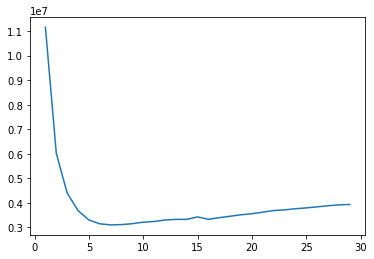

In [26]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(training_df_of_beats)
    wcss.append(kmeans.inertia_ * i)
plt.plot(range(1, 30), wcss)
plt.show()

In [27]:
kmeans = KMeans(n_clusters = wcss.index(min(wcss)), init = 'k-means++', random_state = 42)
kmeans.fit(training_df_of_beats)
all_predictions = kmeans.predict(training_df_of_beats)

In [28]:
pd.Series(all_predictions).value_counts()

0    686
1    680
4    674
5    672
3    672
2    638
dtype: int64